In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#該做什麼努力才能拿高薪

In [158]:
a = pd.read_csv('/Users/tsaifeng-ren/Documents/hometeach/adult.csv')
adult_data = pd.DataFrame(a)
adult_data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status',
                                         'occupation', 'relationship','race','sex','capital-gain','capital-loss',
                                         'hours-per-week','native-country','income']
#car_data = car_data.rename(columns={'vhigh':'buying_price','vhigh.1':'maint_price','2':'num_doors',
                             #'2.1':'num_person','small':'lug_boots','low':'safety','unacc':'acceptability'})
#display(adult_data)

In [159]:
display(adult_data)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [160]:
b = adult_data
b.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [161]:
for col in adult_data.columns:
    print(adult_data[col].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int6

In [163]:
c = b.drop(['race','workclass', 'relationship','native-country','marital-status','education'], axis=1)

In [164]:
def income_to_int(c):
    if c == ' <=50K':
        return (0)
    if c == ' >50K':
        return (1)
def sex_to_int(c):
    if c == ' Male':
        return (1)
    if c ==' Female':
        return (0)
c['income'] = c['income'].apply(income_to_int)
c['sex'] = c['sex'].apply(sex_to_int)

In [165]:
display(c)

,age,fnlwgt,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,income
0,50,83311,13,Exec-managerial,1,0,0,13,0
1,38,215646,9,Handlers-cleaners,1,0,0,40,0
2,53,234721,7,Handlers-cleaners,1,0,0,40,0
3,28,338409,13,Prof-specialty,0,0,0,40,0
4,37,284582,14,Exec-managerial,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,Tech-support,0,0,0,38,0
32556,40,154374,9,Machine-op-inspct,1,0,0,40,1
32557,58,151910,9,Adm-clerical,0,0,0,40,0
32558,22,201490,9,Adm-clerical,1,0,0,20,0


In [166]:
data_dum = pd.get_dummies(c['occupation'])
pd.DataFrame(data_dum)

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32556,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32557,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
32558,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [193]:
d = c.drop(['occupation'],axis=1)
data1 = pd.concat([d,data_dum],axis=1)
display(car_data1)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,?,Adm-clerical,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,215646,9,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,53,234721,7,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32556,40,154374,9,1,0,0,40,1,0,0,...,0,0,1,0,0,0,0,0,0,0
32557,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32558,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,0,0,0


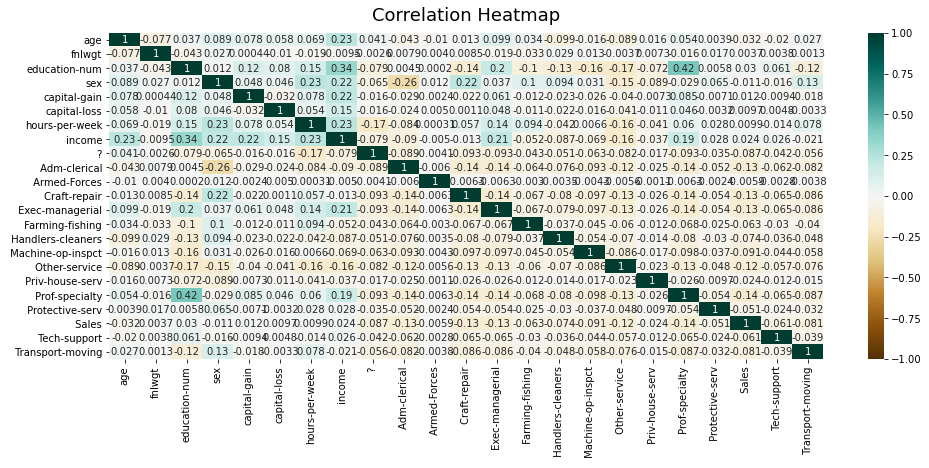

In [168]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(car_data1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [169]:
plt.hist(d.occupation, density=False, color = 'lightblue', cumulative = False, label = "occupation")
plt.legend()
plt.xlabel('occupation')
fig = plt.figure(figsize=(20,6))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'occupation'

In [194]:
display(data1)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,?,Adm-clerical,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,215646,9,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,53,234721,7,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32556,40,154374,9,1,0,0,40,1,0,0,...,0,0,1,0,0,0,0,0,0,0
32557,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32558,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [195]:
data_x = data1.drop(['income'],axis = 1) 
data_y = data1['income']

In [207]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.25, random_state=4)
# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
training_loss = []
test_loss = []
def scores(i):
    clf = RandomForestClassifier(n_estimators=25, max_depth=i)
# 訓練模型
    clf.fit(x_train, y_train)
    y_pred = clf.predict_proba(x_test)
    y_pred_train = clf.predict_proba(x_train)
    training_loss.append(log_loss(y_train, y_pred_train))
    test_loss.append(log_loss(y_test, y_pred))
# 預測測試集
y_pred1 = clf.predict(x_test)

In [199]:
for i in range(1,50):
    scores(i)

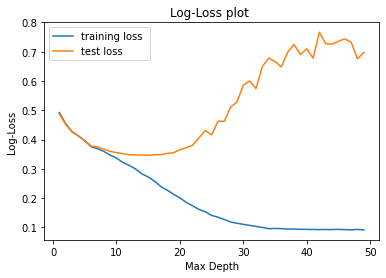

In [203]:
s = np.arange(1,50)
# plotting the line 1 points 
plt.plot(s, training_loss, label = "training loss ")
# plotting the line 2 points 
plt.plot(s, test_loss, label = "test loss ")
plt.xlabel('Max Depth')
# Set the y axis label of the current axis.
plt.ylabel('Log-Loss')
# Set a title of the current axes.
plt.title('Log-Loss plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [208]:
acc = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy: ", acc)

Accuracy:  0.8328009828009828


In [205]:
print(data1.columns)
print("Feature importance: ", clf.feature_importances_)

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', ' ?', ' Adm-clerical', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales',
       ' Tech-support', ' Transport-moving'],
      dtype='object')
Feature importance:  [1.58695320e-01 4.88187494e-03 1.84704227e-01 6.50171443e-02
 3.14401863e-01 5.52308534e-02 9.10641413e-02 2.16144678e-03
 3.58014398e-03 0.00000000e+00 1.24219959e-03 6.22962164e-02
 2.44097813e-03 2.56446894e-03 1.63947958e-03 1.27740831e-02
 2.21624502e-04 3.47077177e-02 7.51921959e-04 6.47830425e-04
 7.89392871e-04 1.87072249e-04]


In [190]:
# 切分訓練集/測試集
# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=1.0)
# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)
# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

In [191]:
lasso.coef_

array([ 1.20192207e-03, -2.32057829e-08,  0.00000000e+00,  0.00000000e+00,
        1.31207631e-05,  1.58099297e-04,  3.79670999e-04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00])

In [192]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.16


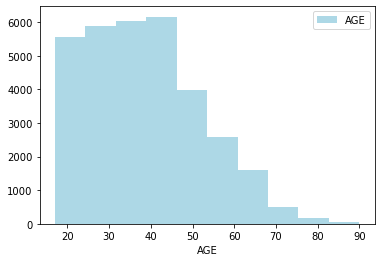

In [201]:
plt.hist(data_x.age, density=False, color = 'lightblue', cumulative = False, label = "AGE")
plt.legend()
plt.xlabel('AGE')
plt.show()

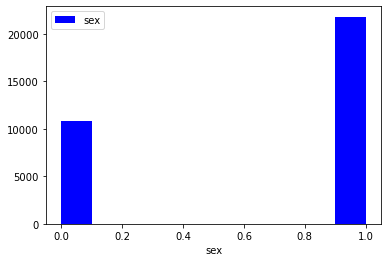

<Figure size 7.2e+07x7200 with 0 Axes>

In [200]:
plt.hist(data_x.sex, density=False, color = 'blue', cumulative = False, label = "sex")
plt.legend()
plt.xlabel('sex')
fig = plt.figure(figsize=(1000000,100))
plt.show()

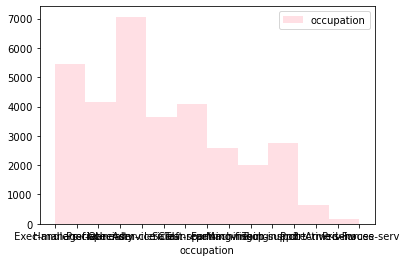

<Figure size 7.2e+07x7.2e+07 with 0 Axes>

In [202]:
plt.hist(b.occupation, density=False, color = 'pink',alpha = 0.5 ,cumulative = False, label = "occupation")
plt.legend()
plt.xlabel('occupation')
fig = plt.figure(figsize=(1000000,1000000))
plt.show()